In [54]:
import pandas as pd
import dateutil
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [55]:
df = pd.read_csv('Created CSVs/all_seins_all_data_standard_dates.csv').drop('Unnamed: 0', axis=1)

In [56]:
df = df[['Date', '# Hauls', 'Common Name', 'Quantity']]

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 4 columns):
Date           1027 non-null object
# Hauls        408 non-null object
Common Name    1027 non-null object
Quantity       869 non-null object
dtypes: object(4)
memory usage: 32.2+ KB


In [58]:
df

,Date,# Hauls,Common Name,Quantity
0,2008-09-13,NaN,sea squirt,NaN
1,2008-09-13,NaN,shore shrimp,NaN
2,2008-09-13,NaN,mantis shrimp,NaN
3,2008-09-13,NaN,sand shrimp,NaN
4,2008-09-13,NaN,hermit crab,NaN
5,2008-09-13,NaN,oyster toadfish,NaN
6,2008-09-13,NaN,striped bass,NaN
7,2008-09-13,NaN,northern kingfish,NaN
8,2008-09-13,NaN,northern pipefish,NaN
9,2008-09-13,NaN,striped searobin,NaN


In [59]:
df = df.dropna()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 603 to 1026
Data columns (total 4 columns):
Date           408 non-null object
# Hauls        408 non-null object
Common Name    408 non-null object
Quantity       408 non-null object
dtypes: object(4)
memory usage: 15.9+ KB


In [61]:
df

,Date,# Hauls,Common Name,Quantity
603,2016-05-26,~7,Comb Jelly,11
604,2016-05-31,10,pipefish,1
605,2016-05-31,10,Altanic Silverside,4
606,2016-05-31,10,mud snail,1
607,2016-05-31,10,whelk snail,1
608,2016-05-31,10,ghost shrimp,3
609,2016-05-31,10,Green crab,2
610,2016-05-31,10,Asian Shore Crab,~20
611,2016-05-31,10,Mussels,~6
612,2016-05-31,10,comb jelly,~50


In [62]:
df['Date'] =  [dateutil.parser.parse(date) for date in list(df['Date'])]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [63]:
set(df[df["# Hauls"].str.contains(r'\d') == False]['# Hauls'])

{'?', 'Many', 'unknown'}

In [64]:
df = df[df["# Hauls"].str.contains(r'\d') == True]

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 281 entries, 603 to 1026
Data columns (total 4 columns):
Date           281 non-null datetime64[ns]
# Hauls        281 non-null object
Common Name    281 non-null object
Quantity       281 non-null object
dtypes: datetime64[ns](1), object(3)
memory usage: 11.0+ KB


In [66]:
import re
hauls = []
for haul in df['# Hauls']:
    first_num  = re.search(r'\d+', haul).group()
    hauls.append(first_num)

In [67]:
df['# Hauls'] = [int(x) for x in hauls]

C:\Program Files\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [68]:
df = df.replace(to_replace=['TMTC','Too Many To Count'], value= '30')

In [69]:
df = df.replace(to_replace="unknown", value= np.nan).dropna()

In [70]:
quants = []
for quant in df['Quantity']:
    first_num  = re.search(r'\d+', quant).group()
    quants.append(first_num)

In [71]:
df['Quantity'] = [int(x) for x in quants]

In [72]:
df['Common Name'] = [str(x) for x in df['Common Name']]

In [73]:
hauls = list(df.groupby(['Date', '# Hauls']).sum().index.get_level_values(1))

In [74]:
dates = list(df.groupby(['Date', '# Hauls']).sum().index.get_level_values(0))

In [75]:
hauls_df = df.groupby(['Date', '# Hauls'], as_index=False).sum()

In [76]:
hauls_data = hauls_df[['# Hauls', 'Quantity']]

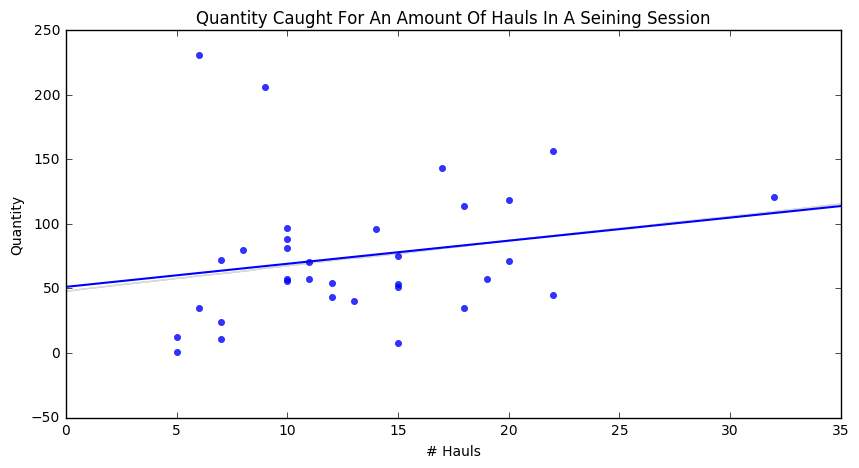

In [77]:
ax = sns.regplot(x="# Hauls", y="Quantity", ci = False,data=hauls_df)
ax.set_title('Quantity Caught For An Amount Of Hauls In A Seining Session')
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Quantity Caught For An Amount Of Hauls In A Seining Session")

In [78]:
# ditch comb jellies

In [79]:
df['Common Name'] = [x.lower() for x in list(df['Common Name'])]

In [80]:
name_changes = {'ctenophore':'comb jelly','comb jellies ctenophores': 'comb jelly', 'comb jellies': 'comb jelly', '20 ctenophores': 'comb jelly'}

In [81]:
df = df.replace(name_changes)

In [82]:
df_no_jellies = df[df['Common Name'] != 'comb jelly']

In [83]:
hauls_df = df_no_jellies.groupby(['Date', '# Hauls'], as_index=False).sum()

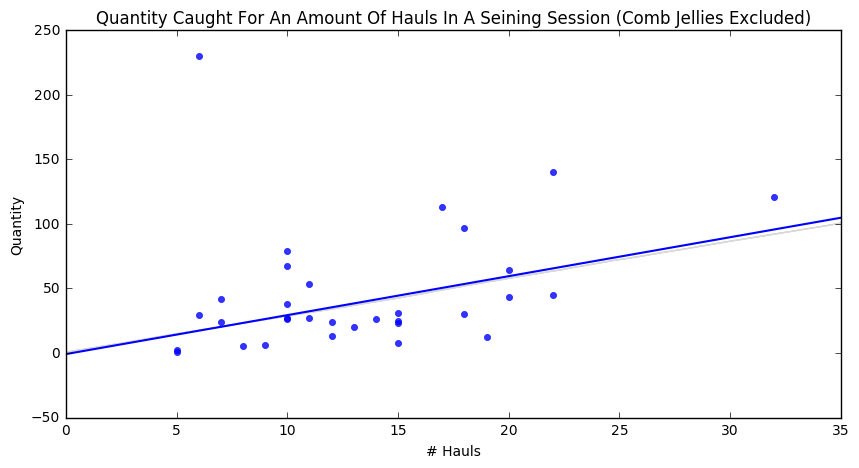

In [84]:
ax = sns.regplot(x="# Hauls", y="Quantity", data=hauls_df, order = 1, ci = False, robust = True)
ax.set_title('Quantity Caught For An Amount Of Hauls In A Seining Session (Comb Jellies Excluded)')
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Quantity Caught For An Amount Of Hauls In A Seining Session (Comb Jellies Excluded)")

In [85]:
# number of species caught

In [86]:
#df

In [87]:
#name_corrected_df = pd.read_csv('Created CSVs/Combined_Name_Corrected_All_Seins.csv')

In [88]:
#name_corrected_df['Date'] =  [dateutil.parser.parse(date) for date in list(name_corrected_df['Date'])]

In [89]:
dates = list(set(df['Date']))

In [90]:
species_count_dict = {}
for date in dates:
    species_count_dict[date] = df[df["Date"] == date].shape[0]

In [91]:
df["Species_Count"] = [species_count_dict[x] for x in df['Date']]

In [92]:
hauls_species_df = df.groupby(['Date', '# Hauls', 'Species_Count'], as_index=False).sum()

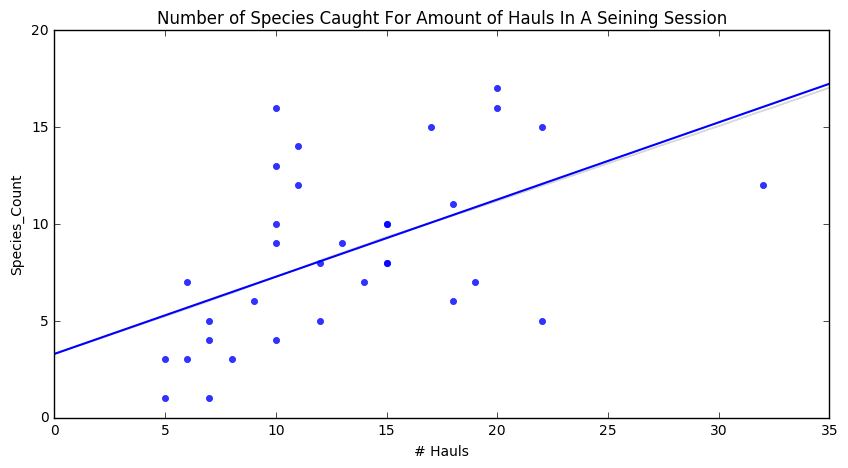

In [93]:
ax = sns.regplot(x="# Hauls", y="Species_Count", data=hauls_species_df, ci = False, order = 1)
ax.set_title("Number of Species Caught For Amount of Hauls In A Seining Session")
ax.figure.set_figheight(5)
ax.figure.set_figwidth(10)
ax.figure.savefig("Graphs/Number of Species Caught For Amount of Hauls In A Seining Session")

In [94]:
# Every 6 seins leads to 4 new species

In [95]:
# 2 fish per haul, 2 new species per 3 hauls

In [99]:
df["Year"] = df['Date'].dt.year

In [104]:
df.tail()

,Date,# Hauls,Common Name,Quantity,Species_Count,Year
1022,2018-10-06,14,long clawed hermit crab,5,7,2018
1023,2018-10-18,7,flounder,1,4,2018
1024,2018-10-18,7,striped bass,8,4,2018
1025,2018-10-18,7,silverside,13,4,2018
1026,2018-10-18,7,herring,2,4,2018


In [105]:
df.groupby(["Year"], as_index=False).mean()

,Year,# Hauls,Quantity,Species_Count
0,2016,13.700000,9.500000,9.111111
1,2017,14.030000,6.640000,11.840000
2,2018,16.522222,10.433333,11.444444


In [108]:
df["Species Richness Per Haul"] = 1.0*df["Species_Count"]/df["# Hauls"] 

In [109]:
df

,Date,# Hauls,Common Name,Quantity,Species_Count,Year,Species Richness Per Haul
603,2016-05-26,7,comb jelly,11,1,2016,0.142857
604,2016-05-31,10,pipefish,1,9,2016,0.900000
605,2016-05-31,10,altanic silverside,4,9,2016,0.900000
606,2016-05-31,10,mud snail,1,9,2016,0.900000
607,2016-05-31,10,whelk snail,1,9,2016,0.900000
608,2016-05-31,10,ghost shrimp,3,9,2016,0.900000
609,2016-05-31,10,green crab,2,9,2016,0.900000
610,2016-05-31,10,asian shore crab,20,9,2016,0.900000
611,2016-05-31,10,mussels,6,9,2016,0.900000
612,2016-05-31,10,comb jelly,50,9,2016,0.900000
